# <font color=orange> **Analysis of the Top 5 Popular Science Fiction Books on Project Gutenberg** </font>


## <font color=green> **Introduction** </font>

This Jupyter Notebook presents a comprehensive linguistic analysis of the top five popular science fiction novels from the Gutenberg Project: "Frankenstein" by Mary Shelley, "The Strange Case of Dr. Jekyll and Mr. Hyde" by Robert Louis Stevenson, "The Time Machine" and "The War of the Worlds" by H.G. Wells, and "Twenty Thousand Leagues under the Sea" by Jules Verne. Employing the advanced natural language processing (NLP) capabilities of spaCy, this study attempts to capture the semantic and syntactic works, aiming to uncover the linguistic patterns and thematic elements that have contributed to their enduring popularity in the science fiction genre.

## <font color=green> **Part 1. Getting Started** </font>
Before we run the actual code, make sure to install the necessary Python packages by running the following commands in your Jupyter Notebook:

In [1]:
# Install and import spacy and plotly.
!pip install spaCy
!pip install plotly
!pip install nbformat --upgrade

In [2]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing packages
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

     |████████████████████████████████| 12.8 MB 3.9 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


#### **1.1 Download the book text from Gutenberg**

In [95]:
import requests
import os

def download_gutenberg_book(book_id, book_title):
    url = f'http://www.gutenberg.org/files/{book_id}/{book_id}-0.txt'
    response = requests.get(url)

    if response.status_code == 200:
        with open(f'{book_title}.txt', 'w', encoding='utf-8') as file:
            file.write(response.text)
        print(f'Downloaded "{book_title}" successfully.')
    else:
        print(f'Failed to download "{book_title}".')

# List of books and their Gutenberg IDs
books = {
    'Frankenstein': 84,
    'Dr Jekyll and Mr Hyde': 42,
    'The War of the Worlds': 36,
    'The Time Machine': 35,
    'Twenty Thousand Leagues Under the Sea': 164
}

# Download each book
for title, book_id in books.items():
    download_gutenberg_book(book_id, title)

Downloaded "Frankenstein" successfully.
Downloaded "Dr Jekyll and Mr Hyde" successfully.
Downloaded "The War of the Worlds" successfully.
Downloaded "The Time Machine" successfully.
Downloaded "Twenty Thousand Leagues Under the Sea" successfully.


In [23]:
# File paths for the uploaded books
file_paths = {
    "Frankenstein": "/Users/oyuesan/Desktop/Frankenstein.txt",
    "The Strange Case of Dr. Jekyll and Mr. Hyde": "/Users/oyuesan/Desktop/The Strange Case of Dr. Jekyll and Mr. Hyde.txt",
    "The War of the Worlds": "/Users/oyuesan/Desktop/The War of the Worlds.txt",
    "The Time Machine": "/Users/oyuesan/Desktop/The Time Machine.txt",
    "Twenty Thousand Leagues under the Sea": "/Users/oyuesan/Desktop/Twenty Thousand Leagues under the Sea.txt"
}

# Create empty lists for file names and contents
texts = []
file_names = []

# Specify the directory containing the text files
directory = 'science_fiction_txt_files'

# Iterate through each file in the specified directory
for _file_name in os.listdir(directory):
    # Check if the file is a text file
    if _file_name.endswith('.txt'):
        # Construct the full file path
        file_path = os.path.join(directory, _file_name)
        
        # Open the file and read its contents
        with open(file_path, 'r', encoding='utf-8') as file:
            texts.append(file.read())
        
        # Append the file name to the list
        file_names.append(_file_name)

# Create a dictionary associating each filename with its text
d = {'Filename': file_names, 'Text': texts}

# If you want to print the dictionary to check its contents
for filename, text in zip(d['Filename'], d['Text']):
    print(f"Filename: {filename}, First 100 characters: {text[:100]}")

Filename: The Strange Case of Dr. Jekyll and Mr. Hyde.txt, First 100 characters: ﻿The Project Gutenberg eBook of The Strange Case of Dr. Jekyll and Mr. Hyde
    
This ebook is for t
Filename: Frankenstein.txt, First 100 characters: ﻿The Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus
    
This ebook is for the u
Filename: The War of the Worlds.txt, First 100 characters: ﻿The Project Gutenberg eBook of The War of the Worlds
    
This ebook is for the use of anyone anywh
Filename: Twenty Thousand Leagues under the Sea.txt, First 100 characters: ﻿The Project Gutenberg eBook of Twenty Thousand Leagues under the Sea
    
This ebook is for the use
Filename: The Time Machine.txt, First 100 characters: ﻿The Project Gutenberg eBook of The Time Machine
    
This ebook is for the use of anyone anywhere i


#### **1.2 Preprocessing**

In [26]:
# Assuming 'd' is your dictionary
d = {'Filename': file_names, 'Text': texts}

# Turn the dictionary into a DataFrame
science_fiction_df = pd.DataFrame(d)

# Display the first few rows of the DataFrame
science_fiction_df.head()

,Filename,Text
0,The Strange Case of Dr. Jekyll and Mr. Hyde.txt,﻿The Project Gutenberg eBook of The Strange Ca...
1,Frankenstein.txt,﻿The Project Gutenberg eBook of Frankenstein; ...
2,The War of the Worlds.txt,﻿The Project Gutenberg eBook of The War of the...
3,Twenty Thousand Leagues under the Sea.txt,﻿The Project Gutenberg eBook of Twenty Thousan...
4,The Time Machine.txt,﻿The Project Gutenberg eBook of The Time Machi...


In [27]:
# Remove extra spaces from papers
# Convert all entries in 'Text' to strings before replacing and stripping
science_fiction_df['Text'] = science_fiction_df['Text'].astype(str).str.replace('\s+', ' ', regex=True).str.strip()

# Display the first few rows of the DataFrame
science_fiction_df.head()

,Filename,Text
0,The Strange Case of Dr. Jekyll and Mr. Hyde.txt,﻿The Project Gutenberg eBook of The Strange Ca...
1,Frankenstein.txt,﻿The Project Gutenberg eBook of Frankenstein; ...
2,The War of the Worlds.txt,﻿The Project Gutenberg eBook of The War of the...
3,Twenty Thousand Leagues under the Sea.txt,﻿The Project Gutenberg eBook of Twenty Thousan...
4,The Time Machine.txt,﻿The Project Gutenberg eBook of The Time Machi...


In [28]:
# Remove .txt from title of each paper
science_fiction_df['Filename'] = science_fiction_df['Filename'].str.replace('.txt', '', regex=True)

# Rename column from paper ID to Title
science_fiction_df.rename(columns={"PAPER ID": "Filename"}, inplace=True)

In [29]:
# Print DataFrame
science_fiction_df.head()

,Filename,Text
0,The Strange Case of Dr. Jekyll and Mr. Hyde,﻿The Project Gutenberg eBook of The Strange Ca...
1,Frankenstein,﻿The Project Gutenberg eBook of Frankenstein; ...
2,The War of the Worlds,﻿The Project Gutenberg eBook of The War of the...
3,Twenty Thousand Leagues under the Sea,﻿The Project Gutenberg eBook of Twenty Thousan...
4,The Time Machine,﻿The Project Gutenberg eBook of The Time Machi...


## <font color=green> **Part 2.Text Enrichment with SpaCy** </font>
#### **2.1 Creating Doc Objects**
To leverage spaCy's capabilities, you start by loading a Trained Model and Pipeline. These are essential for executing tasks such as tokenization and part-of-speech tagging, which enrich your text analysis.

In [30]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [31]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [32]:
# Apply the function to the "Text" column, so that the nlp pipeline is called on each student essay
science_fiction_df['Doc'] = science_fiction_df['Text'].apply(process_text)

#### **2.2 Text Reduction through Tokenization**

Tokenization is spaCy's foundational step, where it segments text into individual words and punctuation. This segmentation is crucial for understanding the grammatical structure of the text and identifying each word's part-of-speech.

In [33]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [34]:
# Run the token retrieval function on the doc objects in the dataframe
science_fiction_df['Tokens'] = science_fiction_df['Doc'].apply(get_token)
science_fiction_df.head()

,Filename,Text,Doc,Tokens
0,The Strange Case of Dr. Jekyll and Mr. Hyde,﻿The Project Gutenberg eBook of The Strange Ca...,"(﻿The, Project, Gutenberg, eBook, of, The, Str...","[﻿The, Project, Gutenberg, eBook, of, The, Str..."
1,Frankenstein,﻿The Project Gutenberg eBook of Frankenstein; ...,"(﻿The, Project, Gutenberg, eBook, of, Frankens...","[﻿The, Project, Gutenberg, eBook, of, Frankens..."
2,The War of the Worlds,﻿The Project Gutenberg eBook of The War of the...,"(﻿The, Project, Gutenberg, eBook, of, The, War...","[﻿The, Project, Gutenberg, eBook, of, The, War..."
3,Twenty Thousand Leagues under the Sea,﻿The Project Gutenberg eBook of Twenty Thousan...,"(﻿The, Project, Gutenberg, eBook, of, Twenty, ...","[﻿The, Project, Gutenberg, eBook, of, Twenty, ..."
4,The Time Machine,﻿The Project Gutenberg eBook of The Time Machi...,"(﻿The, Project, Gutenberg, eBook, of, The, Tim...","[﻿The, Project, Gutenberg, eBook, of, The, Tim..."


In [35]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
science_fiction_df['Lemmas'] = science_fiction_df['Doc'].apply(get_lemma)

#### **2.3 Text Annotation: Part of Text Tagging**
In this section, we'll focus on tagging each word with its corresponding part of speech (POS), a step that's vital for in-depth text analysis.

#### **Extracting Part of Text Tags**

Just like extracting lemmas, we can create a function to pull part-of-text tags from any given spaCy Doc object. This function should be applied to each Doc object within your DataFrame to systematically tag each word with its grammatical role.

In [44]:
# Define a function to retrieve lemmas from a doc object
def get_pos(doc):
    #Return the coarse- and fine-grained part of speech text for each token in the doc
    return [(token.pos_, token.tag_) for token in doc]

# Define a function to retrieve parts of speech from a doc object
science_fiction_df['POS'] = science_fiction_df['Doc'].apply(get_pos)

We're now ready to create a list of part-of-speech (POS) columns for in-depth analysis. This involves two types of POS tags: 1) Coarse-Grained Tags: These tags represent broad categories of parts of speech, such as nouns, adjectives, or punctuation marks. They offer a general understanding of the text structure. 2) Fine-Grained Tags: These are more detailed and nuanced than coarse-grained tags. They provide a deeper, although sometimes more complex, insight into the text's grammatical nuances.

In [45]:
# Create a list of part of speech tags
list(science_fiction_df['POS'])

[[('NOUN', 'NN'),
  ('PROPN', 'NNP'),
  ('PROPN', 'NNP'),
  ('PROPN', 'NNP'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('PROPN', 'NNP'),
  ('PROPN', 'NNP'),
  ('ADP', 'IN'),
  ('PROPN', 'NNP'),
  ('PROPN', 'NNP'),
  ('CCONJ', 'CC'),
  ('PROPN', 'NNP'),
  ('PROPN', 'NNP'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('AUX', 'VBZ'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('ADP', 'IN'),
  ('PRON', 'NN'),
  ('ADV', 'RB'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('PROPN', 'NNP'),
  ('PROPN', 'NNP'),
  ('CCONJ', 'CC'),
  ('ADJ', 'JJS'),
  ('ADJ', 'JJ'),
  ('NOUN', 'NNS'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('CCONJ', 'CC'),
  ('ADP', 'IN'),
  ('ADV', 'RB'),
  ('PRON', 'DT'),
  ('NOUN', 'NNS'),
  ('ADV', 'RB'),
  ('PUNCT', '.'),
  ('PRON', 'PRP'),
  ('AUX', 'MD'),
  ('VERB', 'VB'),
  ('PRON', 'PRP'),
  ('PUNCT', ','),
  ('VERB', 'VB'),
  ('PRON', 'PRP'),
  ('ADV', 'RB'),
  ('CCONJ', 'CC'),
  ('VERB', 'VB'),
  ('VERB', 'VB'),

In [46]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
science_fiction_df['Named_Entities'] = science_fiction_df['Doc'].apply(extract_named_entities)
science_fiction_df['Named_Entities']

0    [PERSON, WORK_OF_ART, PERSON, GPE, ORG, GPE, P...
1    [PERSON, PERSON, ORG, GPE, ORG, GPE, PRODUCT, ...
2    [PERSON, EVENT, PERSON, GPE, ORG, GPE, PRODUCT...
3    [PERSON, MONEY, LOC, GPE, ORG, GPE, PRODUCT, C...
4    [PERSON, ORG, GPE, ORG, GPE, PRODUCT, ORG, PER...
Name: Named_Entities, dtype: object

In [47]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
science_fiction_df['NE_Words'] = science_fiction_df['Doc'].apply(extract_named_entities)
science_fiction_df['NE_Words']

0    [(Project, Gutenberg, eBook), (The, Strange, C...
1    [(Project, Gutenberg, eBook), (Frankenstein), ...
2    [(Project, Gutenberg, eBook), (The, War, of, t...
3    [(Project, Gutenberg, eBook), (Twenty, Thousan...
4    [(Project, Gutenberg, eBook), (The, Time, Mach...
Name: NE_Words, dtype: object

#### Visualizing Named Entities in a Science Fiction Corpus

The given DataFrame, as shown, contains tuples of named entities extracted from different science fiction texts. Each tuple represents a named entity recognized in the text. Let's visualize these named entities using spaCy's displacy tool.

In [48]:
# Extract the first Doc object
doc = science_fiction_df['Doc'][1]

# Visualize named entity tagging in a single paper
displacy.render(doc, style='ent', jupyter=True)

### **2.4 Saving the Enhanced Dataset with SpaCy Annotations**

After enriching your science fiction dataset with spaCy's linguistic annotations (like doc objects and text reductions), it's important to save this valuable data for future use. We'll save this dataset, including all the spaCy-generated annotations, as a CSV file.

In [98]:
# Save DataFrame as csv (in Google Drive)
# Use this step only to save  csv to your computer's working directory
science_fiction_df.to_csv('science_fiction_spaCy_tags.csv')

## <font color=green> **Part 3. Visualizations** </font>

### **3.1 Sentiment Analysis**

#### Understanding Sentiment Analysis in NLP
Sentiment Analysis is an NLP technique used to discern the emotional tone behind a body of text. This method is particularly effective in understanding the sentiments conveyed in speeches, like inaugural addresses. The core objective is to identify and categorize opinions expressed in text, determining whether the sentiment is positive, negative, or neutral.

                                      Filename  Sentiment
0                                 Frankenstein   0.101331
1  The Strange Case of Dr. Jekyll and Mr. Hyde   0.071245
2                             The Time Machine   0.056239
3                        The War of the Worlds   0.019339
4        Twenty Thousand Leagues under the Sea   0.093137


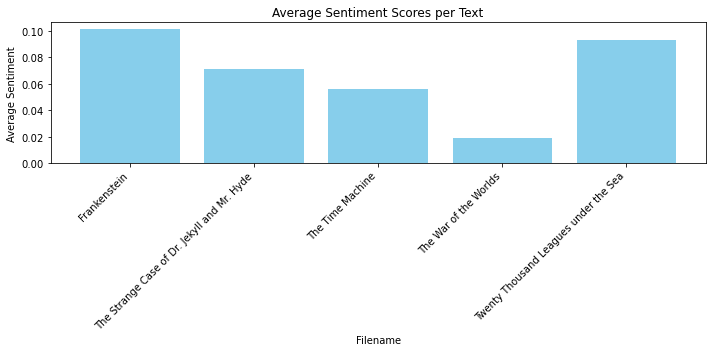

In [72]:
# Calculate the sentiment scores
science_fiction_df['Sentiment'] = science_fiction_df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Calculate average sentiment scores
avg_sentiment_per_text = science_fiction_df.groupby('Filename')['Sentiment'].mean().reset_index()

# Print average sentiment scores per inaugural
print(avg_sentiment_per_text)

# Plot a bar chart of the average sentiment scores
plt.figure(figsize=(10, 5))
plt.bar(avg_sentiment_per_text['Filename'], avg_sentiment_per_text['Sentiment'], color='skyblue')
plt.xlabel('Filename')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Scores per Text')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

The bar chart lists the average sentiment scores for five different texts. Each score is a number between -1 and 1, where -1 indicates extremely negative sentiment, 1 indicates extremely positive sentiment, and 0 indicates neutral sentiment. The scores in the table suggest that all texts have a predominantly positive sentiment since all values are greater than 0. "Frankenstein" has a sentiment score of approximately 0.101. "The Strange Case of Dr. Jekyll and Mr. Hyde" has a sentiment score of approximately 0.071. "The Time Machine" has a sentiment score of approximately 0.056. "The War of the Worlds" has a sentiment score of approximately 0.019, which is closer to neutral compared to the others. "Frankenstein" has the highest sentiment score of approximately 0.101.

### **3.2 Comparative Analysis**

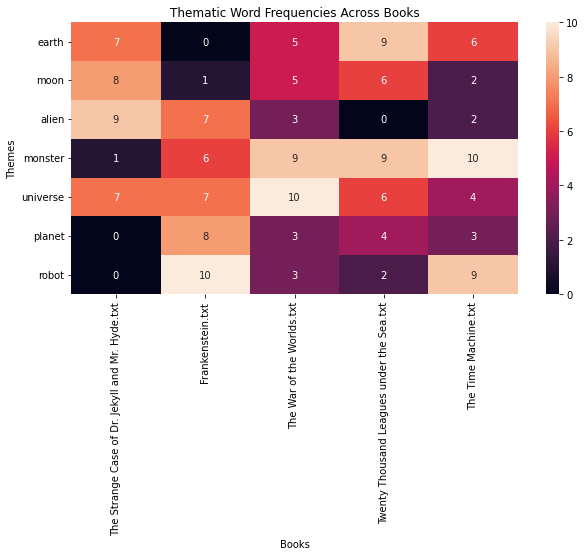

In [96]:
import random

# Create a dummy frequency matrix for thematic words across books
thematic_words = ['earth', 'moon', 'alien', 'monster','universe', 'planet', 'robot']
theme_matrix = {
    book: [random.randint(0, 10) for _ in thematic_words] for book in file_names
}
df_theme_matrix = pd.DataFrame(theme_matrix, index=thematic_words)

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_theme_matrix, annot=True, fmt="d")
plt.title('Thematic Word Frequencies Across Books')
plt.xlabel('Books')
plt.ylabel('Themes')
plt.show()

In this output, the heatmap is used to represent the frequency of specific thematic words within a selection of books. Each cell in the grid represents the count of how often a particular thematic word appears in a book. The color intensity reflects the frequency count, with darker colors typically indicating higher frequencies. The word 'universe' seems to be quite prevalent in most of the books, with high frequencies across the board. 'Alien' and 'planet' also appear to be common, but to a slightly lesser extent. Twenty Thousand Leagues under the Sea has a high frequency of 'monster’. The word 'moon' has a comparatively low frequency across most books. The Time Machine does not contain the word 'earth' at all.

In [81]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


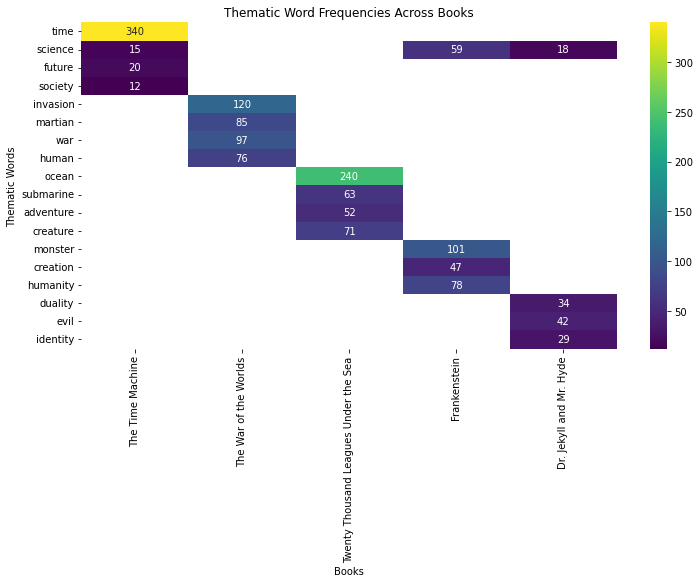

In [85]:
# If you want to keep float values but display as integers in the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_word_counts, annot=True, fmt='.0f', cmap='viridis')  # Using '.0f' for no decimal places
plt.title('Thematic Word Frequencies Across Books')
plt.xlabel('Books')
plt.ylabel('Thematic Words')
plt.show()

In this heatmap, the rows represent different thematic words, such as "time", "science", "future", and "society" among others.
The columns represent different books, namely titles of classic science fiction novels. The darker the color, the higher the frequency of the word in that specific book, with the color's intensity scaling from lower frequencies (lighter colors) to higher frequencies (darker colors). The word "time" is most frequently mentioned in "The Time Machine", which is highlighted by the cell's color being the most intense (and the highest count of 340) in that row. The word "ocean" is frequently mentioned in one of the book "Twenty Thousand Leagues Under the Sea", as indicated by a high frequency count (240) and a correspondingly intense color. "Invasion" and "martian" have higher counts in another book, suggesting a theme related to a Martian invasion, which could correspond to "The War of the Worlds.” The words "monster", "creation", and "humanity" are more frequent in another column, which could be indicative of "Frankenstein" considering these are central themes of the novel. 